In [319]:
import pandas as pd
import string
import re

import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist

from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary

KeyboardInterrupt: 

In [ ]:
messy_df = pd.read_pickle('../data/messy_df.pkl')

In [ ]:
messy_df.head()

,created_utc,subreddit,subreddit_subscribers,name_code,title,text,upvote_ratio,num_comments,url,image?,image_text
0,1.502177e+09,TheRedPill,0.0,t3_6sbx6i,Google Fires Ph.D Biologist/Engineer For Claim...,"As reported in Bloomberg, Google has fired a s...",0.65,840.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
1,1.480424e+09,TheRedPill,0.0,t3_5fihmu,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,**A complete guide to picking up 9s and 10s** ...,0.83,760.0,https://www.reddit.com/r/TheRedPill/comments/5...,False,
2,1.502101e+09,TheRedPill,0.0,t3_6s4mfa,I have been practicing Stoicism for 3 years no...,**Practical Stoicism Tools**\n\nStoicism philo...,0.86,179.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,
3,1.433962e+09,TheRedPill,0.0,t3_39bvdm,"[META] Reddit rolls out first ban wave of ""Har...",The most notorious target was FatPeopleHate. Y...,0.87,954.0,https://www.reddit.com/r/TheRedPill/comments/3...,False,
4,1.500270e+09,TheRedPill,0.0,t3_6nr5yo,"Man gets his ex-GF to pay child support, and R...",Kind of surprised this hasn't made its way her...,0.90,336.0,https://www.reddit.com/r/TheRedPill/comments/6...,False,


In [ ]:
# Drop duplicates again based on Reddit's unique name code
messy_df = messy_df.drop_duplicates('name_code')

In [ ]:
# Just making sure
messy_df['name_code'].value_counts()

t3_6sbx6i    1
t3_cvnj75    1
t3_h7wngb    1
t3_t1624t    1
t3_cs2t9u    1
            ..
t3_tq92g8    1
t3_p48vxo    1
t3_oxwcfo    1
t3_rt09sg    1
t3_rgn2r9    1
Name: name_code, Length: 32511, dtype: int64

In [ ]:
# Combine all text for tokenization and vectorization
messy_df['total_text'] = messy_df['title'] + ' ' + messy_df['image_text'] + ' ' + messy_df['text']

In [ ]:
# drop unecessary columns
messy_df = messy_df.drop(columns= ['title', 'text', 'image_text'])

In [ ]:
# Drop any empty rows
messy_df['total_text'].dropna()

0        Google Fires Ph.D Biologist/Engineer For Claim...
1        HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...
2        I have been practicing Stoicism for 3 years no...
3        [META] Reddit rolls out first ban wave of "Har...
4        Man gets his ex-GF to pay child support, and R...
                               ...                        
37626    Joe Rogan Derangement Syndrome “IVE BEEN DRINK...
37627    Non-Republican visitors: If you want to ask us...
37628    I mean. He's not wrong. Elon Musk @\n\nralanle...
37629    The heros of Texas right now, show these ppl s...
37630    Elon Musk roasts Elizabeth Warren. Calls her S...
Name: total_text, Length: 32511, dtype: object

In [ ]:
# Create stopword list. It is long
stopwords_ = stopwords.words('English')
stopwords_ += list(string.punctuation)
stopwords_ += ['’', "'s", "n't", "''", '``', '--', '”', '“', "'m", '...', "'ll", "'d", '‘', "'re", "'ve", "\\-", '—', '–', 'x200b', '..', '....', '©']

stopwords_ += ['r', 'www', 'https', 'http', 'com', 'post', 'sub', 'account', 'imgur', 'amp', 'jpg', 'png', 'twitter'] #commonly used reddit link words
stopwords_ += ['like', 'would', 'much', 'also', 'really', 'even', 'gt', 'us', 'never', 'see', 'way', 'could', 'back', 'need', 'take', 'get',
                 'one', 'time', 'want', 'make', 'know', 'thing', 'got', 'many', 'every', 'let', 'lot', 'ever', 'around', 'put', 'enough', 
                 'sure', 'may', 'must', 'went', 'often', 'might', 'get', 'probably', 'literally', 'though', 'else', 'least', 'yet', 'set', 
                 'oh', 'na', 'finally', 'nbsp', 'almost', 'simply', 'wo', 'whatever', 'sometimes', 'completely', 'permanently', 'actual', 'possible',
                 'absolutely', 'within', 'including', 'thing', 'something'] #common words in the dataset

In [ ]:
# Initialize lemmatizer for helper function
lemmatizer = WordNetLemmatizer()

In [ ]:
def stop_and_lemmatize(string):
    """
    Helper function for tokenizing and lemmatizing
    """
    # word_list = re.split(r'[^a-zA-Z]', string)
    # current = list(filter(None, word_list))

    current = word_tokenize(string)

    total = [x.lower() for x in current if x.lower() not in stopwords_ and len(x) > 1]

    final = [lemmatizer.lemmatize(x) for x in total]

    return final

In [ ]:
# Apply helper function to stop, tokenize, and lemmatize total text
messy_df['tokenned_stopped_text'] = messy_df['total_text'].apply(stop_and_lemmatize)

In [1]:
# Pull total corpus out of the dataframe
corpus_series = messy_df['tokenned_stopped_text']

NameError: name 'messy_df' is not defined

In [ ]:
#Create total corpus of the data for frequency analysis
new_corpus_series = []

for word_list in corpus_series:
    new_corpus_series.extend(word_list)

In [ ]:
# convert to series
new_corpus_series = pd.Series(new_corpus_series)

In [ ]:
# How many words are in the corpus
len(new_corpus_series)

1186368

In [ ]:
# Get the most frequent words in the corpus
freqdist = FreqDist(new_corpus_series)
most_common = freqdist.most_common(1000)
most_common

[('people', 7731),
 ('woman', 7340),
 ('year', 4441),
 ('men', 4047),
 ('say', 3638),
 ('day', 3597),
 ('go', 3564),
 ('think', 3349),
 ('right', 3095),
 ('guy', 3054),
 ('life', 3053),
 ('girl', 3011),
 ('man', 2756),
 ('trump', 2706),
 ('going', 2673),
 ('new', 2462),
 ('work', 2461),
 ('good', 2449),
 ('said', 2319),
 ('first', 2300),
 ('feel', 2268),
 ('comment', 2256),
 ('still', 2114),
 ('look', 2009),
 ('made', 1916),
 ('child', 1887),
 ('friend', 1859),
 ('love', 1741),
 ('come', 1738),
 ('give', 1726),
 ('thing', 1718),
 ('fuck', 1704),
 ('world', 1684),
 ('well', 1678),
 ('kid', 1668),
 ('sex', 1662),
 ('someone', 1659),
 ('pm', 1653),
 ('state', 1631),
 ('share', 1620),
 ('tell', 1580),
 ('getting', 1531),
 ('use', 1518),
 ('today', 1514),
 ('everyone', 1510),
 ('edit', 1490),
 ('point', 1484),
 ('told', 1469),
 ('old', 1459),
 ('ca', 1451),
 ('school', 1450),
 ('ago', 1449),
 ('thought', 1431),
 ('person', 1430),
 ('find', 1427),
 ('actually', 1419),
 ('help', 1404),
 ('rep

In [ ]:
# top 30 most frequent words
top_30 = most_common[0:30]

In [ ]:
# Helper code for plotting the data
x = []
y = []

for tuple in top_30:
    x.append(tuple[0])
    y.append(tuple[1])

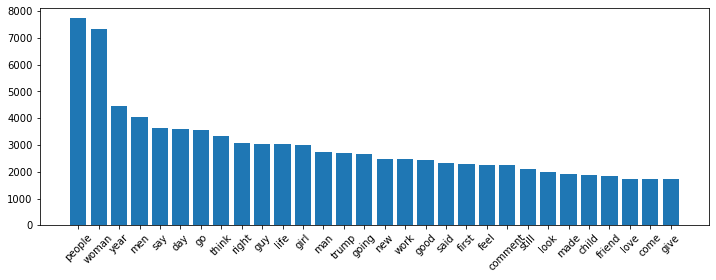

In [ ]:
# Plot frequency distribution
fig, ax = plt.subplots()

fig.set_figwidth(12)

ax.bar(x,y)
plt.xticks(rotation = 45)
plt.show()

In [ ]:
# Join all text for for modeling
messy_df['finalized_text'] = messy_df['tokenned_stopped_text'].apply(lambda x: " ".join(x))

## Combine text by subreddit for clustering

In [ ]:
#Clean the data a bit for modeling
agg_df = messy_df.drop(columns = ['created_utc', 'num_comments', 'subreddit_subscribers', 'upvote_ratio', 'image?', 'url'])

In [ ]:
agg_df.head()

,subreddit,name_code,total_text,tokenned_stopped_text,finalized_text
0,TheRedPill,t3_6sbx6i,Google Fires Ph.D Biologist/Engineer For Claim...,"[google, fire, ph.d, biologist/engineer, claim...",google fire ph.d biologist/engineer claiming a...
1,TheRedPill,t3_5fihmu,HOW TO GET LAID LIKE A WARLORD: 37 Rules of Ap...,"[laid, warlord, 37, rule, approaching, model-t...",laid warlord 37 rule approaching model-tier gi...
2,TheRedPill,t3_6s4mfa,I have been practicing Stoicism for 3 years no...,"[practicing, stoicism, year, quality, life, in...",practicing stoicism year quality life increase...
3,TheRedPill,t3_39bvdm,"[META] Reddit rolls out first ban wave of ""Har...","[meta, reddit, roll, first, ban, wave, harassi...",meta reddit roll first ban wave harassing subr...
4,TheRedPill,t3_6nr5yo,"Man gets his ex-GF to pay child support, and R...","[man, get, ex-gf, pay, child, support, reddit,...",man get ex-gf pay child support reddit freak k...


In [ ]:
# combine text by subreddit
total_text_dict = {}

for index, row in agg_df.iterrows():
    if row['subreddit'] in total_text_dict.keys():
        total_text_dict[row['subreddit']] = total_text_dict[row['subreddit']] + ' ' + row['finalized_text']
    else:
        print(row['subreddit'])
        total_text_dict[row['subreddit']] = row['finalized_text']

TheRedPill
BlackPeopleTwitter
WhitePeopleTwitter
politics
law
news
worldnews
Jokes
funny
gaming
Games
technology
tech
technews
gadgets
space
science
nextfuckinglevel
dataisbeautiful
MurderedByWords
mildlyinteresting
Damnthatsinteresting
mildlyinfuriating
wallstreetbets
Superstonk
shitposting
pcmasterrace
teenagers
PublicFreakout
memes
AskReddit
AskAnAmerican
Gamingcirclejerk
nottheonion
gatesopencomeonin
wholesomememes
wholesome
interestingasfuck
PoliticalCompassMemes
PoliticalHumor
AskMen
AskWomen
TooAfraidToAsk
MadeMeSmile
rareinsults
UFOs
HighStrangeness
todayilearned
RoastMe
CryptoCurrency
Wellthatsucks
barstoolsports
awfuleverything
unpopularopinion
atheism
Christianity
Catholicism
changemyview
Coronavirus
COVID19
coronavirusNYC
Masks4All
environment
environment2
TrollXChromosomes
TrollYChromosome
WikiLeaks
4chan
greentext
NoStupidQuestions
offmychest
texas
TexasPolitics
CanadaPolitics
florida
terriblefacebookmemes
insanepeoplefacebook
ShitMomGroupsSay
masskillers
Parenting
Marria

In [ ]:
#turn dict into dataframe
final_df = pd.DataFrame.from_dict(total_text_dict, orient = 'index')

In [ ]:
# rename
final_df = final_df.rename(columns = {0 : 'text'})

In [ ]:
final_df.index

Index(['TheRedPill', 'BlackPeopleTwitter', 'WhitePeopleTwitter', 'politics',
       'law', 'news', 'worldnews', 'Jokes', 'funny', 'gaming',
       ...
       'CCW', 'Glocks', 'tacticalgear', 'liberalgunowners', 'HillaryForPrison',
       'Offensivejokes', 'climateskeptics', 'LockdownCriticalLeft',
       'FightingFakeNews', 'Republican'],
      dtype='object', length=193)

In [ ]:
# Pickle data for modeling

pd.to_pickle(final_df, '../data/preprocessed_df.pkl')

## Topic Modeling

In [ ]:

lda_text = final_df['text'].apply(lambda x: x.split(" "))

In [ ]:
corpus_dictionary = Dictionary(lda_text)
corpus = [corpus_dictionary.doc2bow(text) for text in lda_text]

In [ ]:
lda = LdaModel(corpus, num_topics = 5, id2word= corpus_dictionary)

In [ ]:
lda.print_topics(num_words = 20)

[(0,
  '0.007*"people" + 0.005*"woman" + 0.003*"men" + 0.003*"year" + 0.003*"right" + 0.003*"going" + 0.003*"life" + 0.003*"think" + 0.002*"girl" + 0.002*"go" + 0.002*"feel" + 0.002*"say" + 0.002*"day" + 0.002*"trump" + 0.002*"man" + 0.002*"guy" + 0.002*"said" + 0.002*"kid" + 0.002*"work" + 0.002*"child"'),
 (1,
  '0.006*"woman" + 0.006*"people" + 0.004*"men" + 0.003*"think" + 0.003*"trump" + 0.003*"say" + 0.003*"man" + 0.003*"year" + 0.003*"go" + 0.003*"day" + 0.003*"good" + 0.002*"life" + 0.002*"going" + 0.002*"girl" + 0.002*"guy" + 0.002*"work" + 0.002*"first" + 0.002*"still" + 0.002*"right" + 0.002*"comment"'),
 (2,
  '0.006*"woman" + 0.005*"people" + 0.003*"year" + 0.003*"say" + 0.003*"guy" + 0.003*"right" + 0.003*"think" + 0.002*"men" + 0.002*"girl" + 0.002*"go" + 0.002*"said" + 0.002*"day" + 0.002*"work" + 0.002*"new" + 0.002*"going" + 0.002*"good" + 0.002*"first" + 0.002*"man" + 0.001*"look" + 0.001*"still"'),
 (3,
  '0.006*"people" + 0.005*"woman" + 0.004*"year" + 0.003*"day" 

In [ ]:
# send data to csv to modeling
messy_df.to_csv('../data/posts.csv')